## Project Introduction

User segmentation is an important aspect of data analytics. By dissecting user behaviors and preferences, segmentation allows us to have a precise idea of our audience. In this presentation, we'll explore how this strategic approach allows us to tailor experiences, anticipate needs, and drive impactful decision-making based on data-driven insights.


## Project Objective

The purpose of this project was to perform customer segmentation using behavioral analysis, focusing on the RFM (Recency, Frequency, Monetary) model, and employing two clustering algorithms: K-means and Gaussian Mixture Models (GMM). The goal was to identify distinct customer segments based on their purchasing behavior and evaluate the effectiveness of each clustering algorithm

## Data Understanding

Performing exploratory data analysis on a purchase dataset to comprehend its structure, features, and summary statistics for initial insights into the underlying patterns and characteristics.


first we import pandas and numpy as well as importing the dataset and printing the last 10 rows to see if it works.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data_customer = pd.read_csv('olist_customers_dataset.csv')
data_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
data_orders = pd.read_csv('olist_orders_dataset.csv')
data_order_items = pd.read_csv('olist_order_items_dataset.csv')
data_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
data_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
data_products = pd.read_csv('olist_products_dataset.csv')
data_sellers = pd.read_csv('olist_sellers_dataset.csv')

print("The last 10 rows of the dataframe") 
data_customer.tail(10)


The last 10 rows of the dataframe


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99431,be842c57a8c5a62e9585dd72f22b6338,ca186065de6e2d01cfc99763e6d62048,99150,marau,RS
99432,f255d679c7c86c24ef4861320d5b7675,d111b06b6f3a2add0d2241325f65b5ca,13500,rio claro,SP
99433,14308d2303a3e2bdf4939b86c46d2679,e7f8760e2bbd2f1986bebd99596c088e,66033,belem,PA
99434,f5a0b560f9e9427792a88bec97710212,b3e53d18a997f27a3ffd16da497eaf58,7790,cajamar,SP
99435,7fe2e80252a9ea476f950ae8f85b0f8f,4b5820135d360a45552b5163835b1d89,35500,divinopolis,MG
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


In [2]:
print("The last 10 rows of the second dataframe") 
data_orders.tail(10)

The last 10 rows of the second dataframe


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99431,b0f4af5c1b06e24fef510703bfe9f0a6,8e1ec396e317ff4c82a03ce16a0c3eb3,delivered,2017-10-27 15:21:00,2017-10-27 15:32:49,2017-10-30 15:44:34,2017-11-10 17:57:22,2017-11-22 00:00:00
99432,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00
99433,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07 00:00:00
99434,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17 00:00:00
99435,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22 00:00:00
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


In [3]:
print("The last 10 rows of the third dataframe") 
data_order_items.tail(10)

The last 10 rows of the third dataframe


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112640,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112643,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112644,fffbee3b5462987e66fb49b1c5411df2,1,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,2018-06-28 09:58:03,119.85,20.03
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


creating and naming headers and printing the array

In [4]:
headers = ["customer_id", "customer_unique_id", "customer_zip_code_prefix", "customer_city", "customer-city"]

data_customer.columns = headers
print(data_customer.columns)


Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer-city'],
      dtype='object')


printing the list of the header and their class

In [5]:
print(data_customer.dtypes)
print(data_orders.dtypes)
print(data_order_items.dtypes)

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer-city               object
dtype: object
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


show a describtion table of the dataset used including the count and the frequency of each column

In [6]:
data_customer.describe(include = "all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer-city
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [7]:
data_orders.describe(include = "all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [8]:
data_order_items.describe(include = "all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


printing the dataset's info

In [9]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer-city             99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


## Data Cleaning

Conducting data cleaning on the purchase dataset, addressing missing values, outliers, and inconsistencies to ensure a clean and reliable foundation for analysis.


### Replace missing values with NaN

Show where the missing data is

In [10]:
missing_data1 = data_customer.isnull()
missing_data1.head(6)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer-city
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False


In [11]:
missing_data2 = data_orders.isnull()
missing_data2.head(6)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False


In [12]:
missing_data3 = data_order_items.isnull()
missing_data3.head(6)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False


Count the number of missing values in each column

In [13]:
for column in missing_data1.columns.values.tolist():
    print(column)
    print (missing_data1[column].value_counts())
    print("")  

customer_id
customer_id
False    99441
Name: count, dtype: int64

customer_unique_id
customer_unique_id
False    99441
Name: count, dtype: int64

customer_zip_code_prefix
customer_zip_code_prefix
False    99441
Name: count, dtype: int64

customer_city
customer_city
False    99441
Name: count, dtype: int64

customer-city
customer-city
False    99441
Name: count, dtype: int64



In [14]:
for column in missing_data2.columns.values.tolist():
    print(column)
    print (missing_data2[column].value_counts())
    print("")  

order_id
order_id
False    99441
Name: count, dtype: int64

customer_id
customer_id
False    99441
Name: count, dtype: int64

order_status
order_status
False    99441
Name: count, dtype: int64

order_purchase_timestamp
order_purchase_timestamp
False    99441
Name: count, dtype: int64

order_approved_at
order_approved_at
False    99281
True       160
Name: count, dtype: int64

order_delivered_carrier_date
order_delivered_carrier_date
False    97658
True      1783
Name: count, dtype: int64

order_delivered_customer_date
order_delivered_customer_date
False    96476
True      2965
Name: count, dtype: int64

order_estimated_delivery_date
order_estimated_delivery_date
False    99441
Name: count, dtype: int64



In [15]:
for column in missing_data3.columns.values.tolist():
    print(column)
    print (missing_data3[column].value_counts())
    print("")  

order_id
order_id
False    112650
Name: count, dtype: int64

order_item_id
order_item_id
False    112650
Name: count, dtype: int64

product_id
product_id
False    112650
Name: count, dtype: int64

seller_id
seller_id
False    112650
Name: count, dtype: int64

shipping_limit_date
shipping_limit_date
False    112650
Name: count, dtype: int64

price
price
False    112650
Name: count, dtype: int64

freight_value
freight_value
False    112650
Name: count, dtype: int64



Delete the rows with the missing data

In [16]:
data_customer.dropna(axis=0, inplace=True)

In [17]:
data_customer.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer-city
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


## Data Visualisation

There are <bound method Series.unique of 0                       franca
1        sao bernardo do campo
2                    sao paulo
3              mogi das cruzes
4                     campinas
                 ...          
99436                sao paulo
99437          taboao da serra
99438                fortaleza
99439                   canoas
99440                    cotia
Name: customer_city, Length: 99441, dtype: object> unique cities in the database.

TOP 20 cities cover 42.2 percent of all the orders.


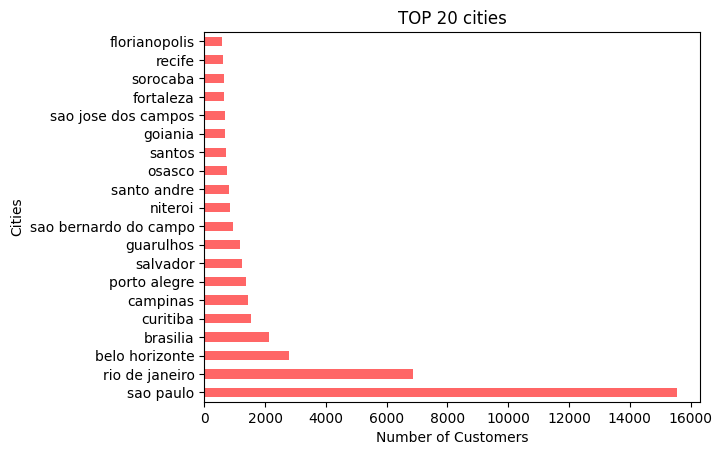

In [18]:
import matplotlib.pyplot as plt  # You need to import the matplotlib library for plotting.

colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
# Grouping and plotting the most frequent cities
cities = data_customer["customer_city"].unique
citiesTop =data_customer.groupby("customer_city")["customer_id"].nunique().sort_values(ascending=False)
print("There are", cities, "unique cities in the database.")
print("\nTOP 20 cities cover", round(citiesTop.head(20).sum() / data_customer.shape[0] * 100, 1), "percent of all the orders.")
citiesTop.head(20).plot(kind='barh', color=colors[0])
plt.ylabel("Cities")
plt.xlabel("Number of Customers")
plt.title("TOP 20 cities")
plt.show()  # Add this line to display the plot.


In [19]:
orders_fmt = data_orders.copy()
orders_fmt["order_purchase_timestamp"] = pd.to_datetime(data_orders["order_purchase_timestamp"], format='%Y-%m-%d %H:%M:%S')
orders_fmt["order_delivered_carrier_date"] = pd.to_datetime(data_orders["order_delivered_carrier_date"], format='%Y-%m-%d %H:%M:%S')
orders_fmt["order_delivered_customer_date"] = pd.to_datetime(data_orders["order_delivered_customer_date"], format='%Y-%m-%d %H:%M:%S')
orders_fmt["order_estimated_delivery_date"] = pd.to_datetime(data_orders["order_estimated_delivery_date"], format='%Y-%m-%d %H:%M:%S')

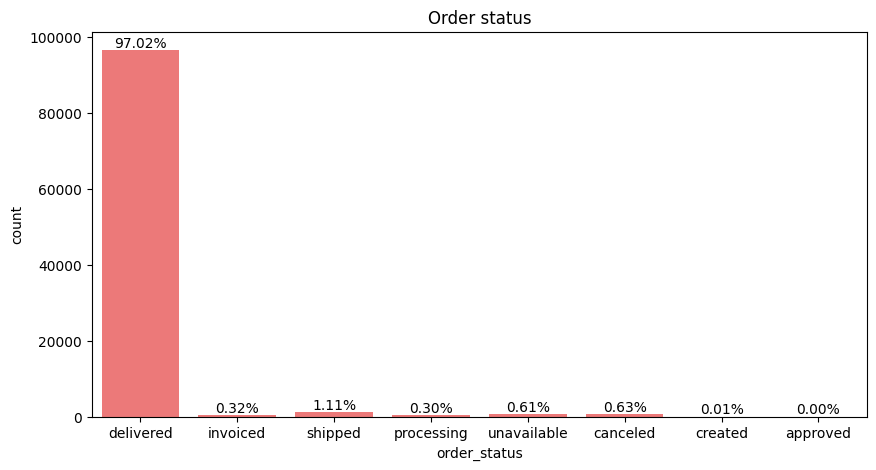

In [20]:
# Bar graph with annotations
plt.figure(figsize=(10, 5))
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
plots = sns.countplot(x="order_status", data=data_orders , color=colors[0])

for bar in plots.patches:
    plots.annotate(format(((bar.get_height()/len(data_orders['order_status'])*100)), '.2f')+"%",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
 
plt.title("Order status")
plt.show()



Most products are delivered but still there are 3% which were under processed, cancelled, unavailable. They were not delivered.


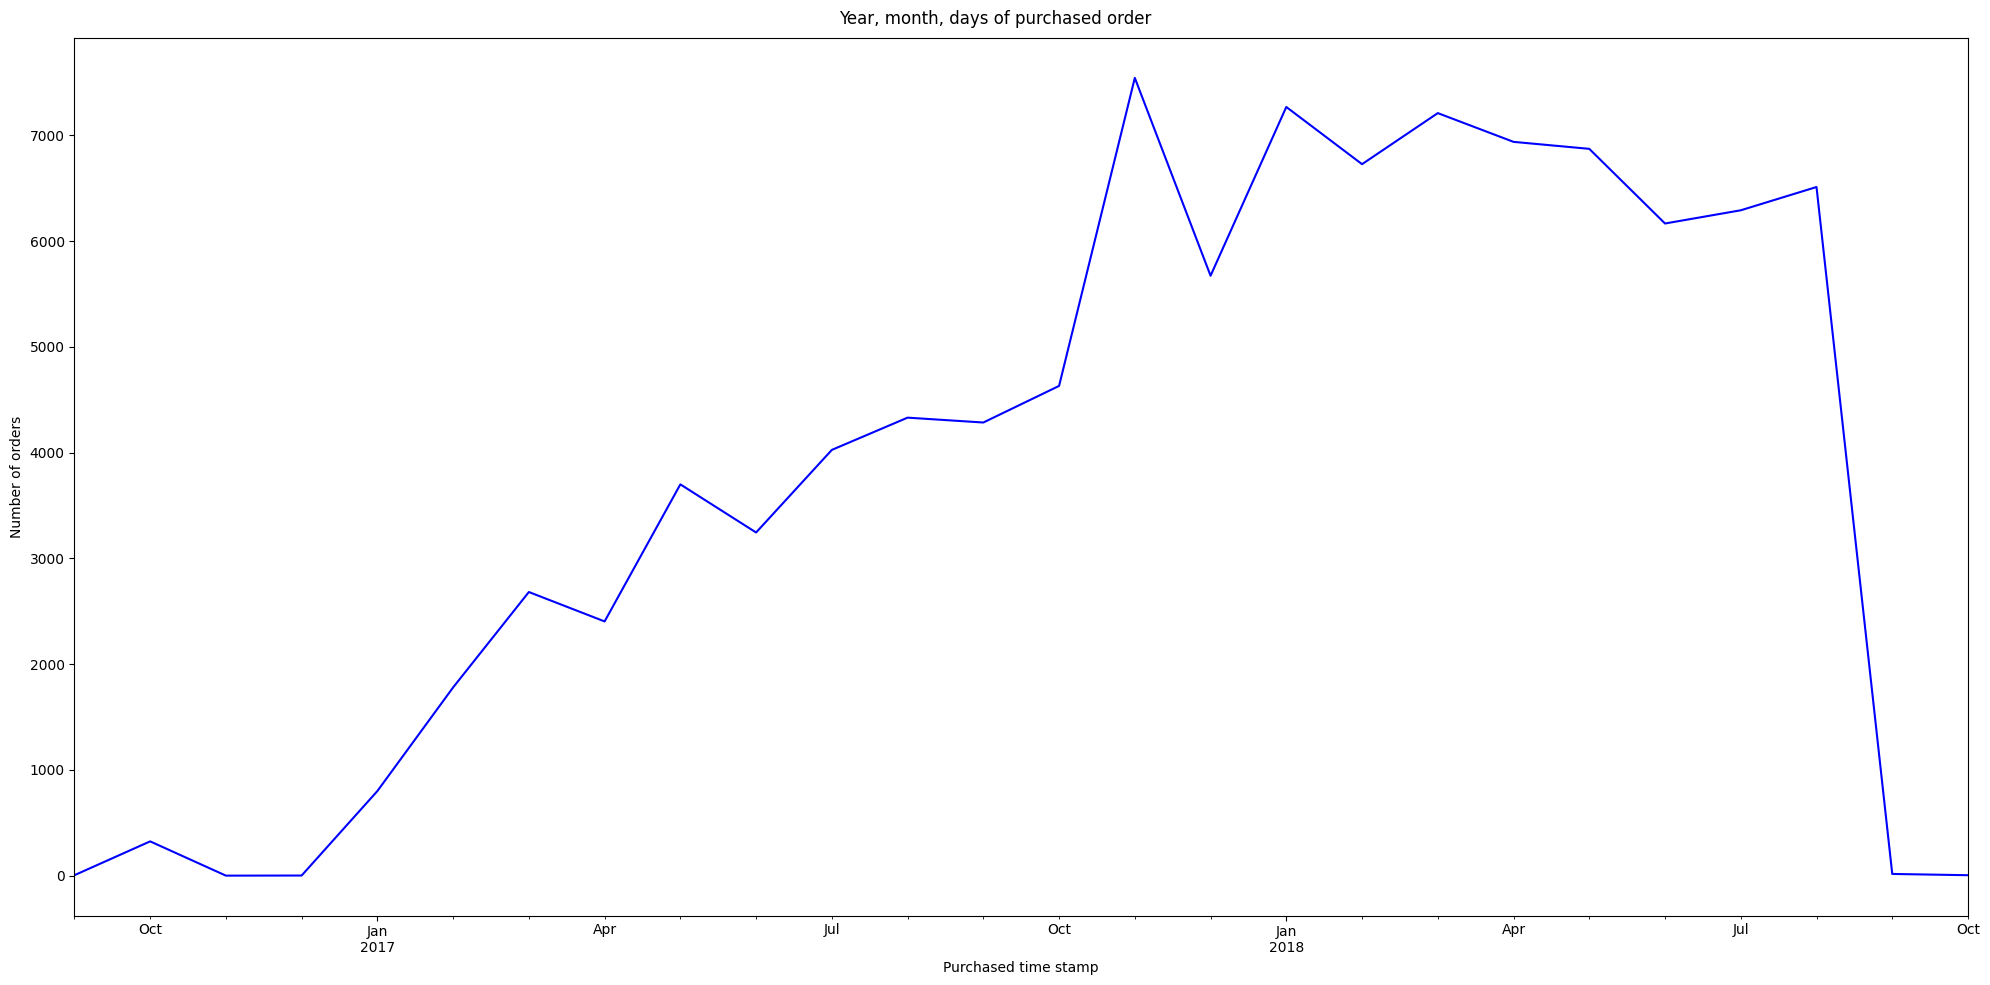

In [21]:


import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have defined 'colors' somewhere in your code
colors = ['blue']

fig, ax = plt.subplots(1, 1, figsize=(20, 10), tight_layout=True)
fig.suptitle("Year, month, days of purchased order")

# line chart for all over purchase timestamp
counts = orders_fmt.set_index("order_purchase_timestamp").groupby(pd.Grouper(freq='M')).count()
counts.plot(y="order_id", color=colors[0], legend=False, ax=ax)

ax.set_xlabel("Purchased time stamp")
ax.set_ylabel("Number of orders")

plt.show()


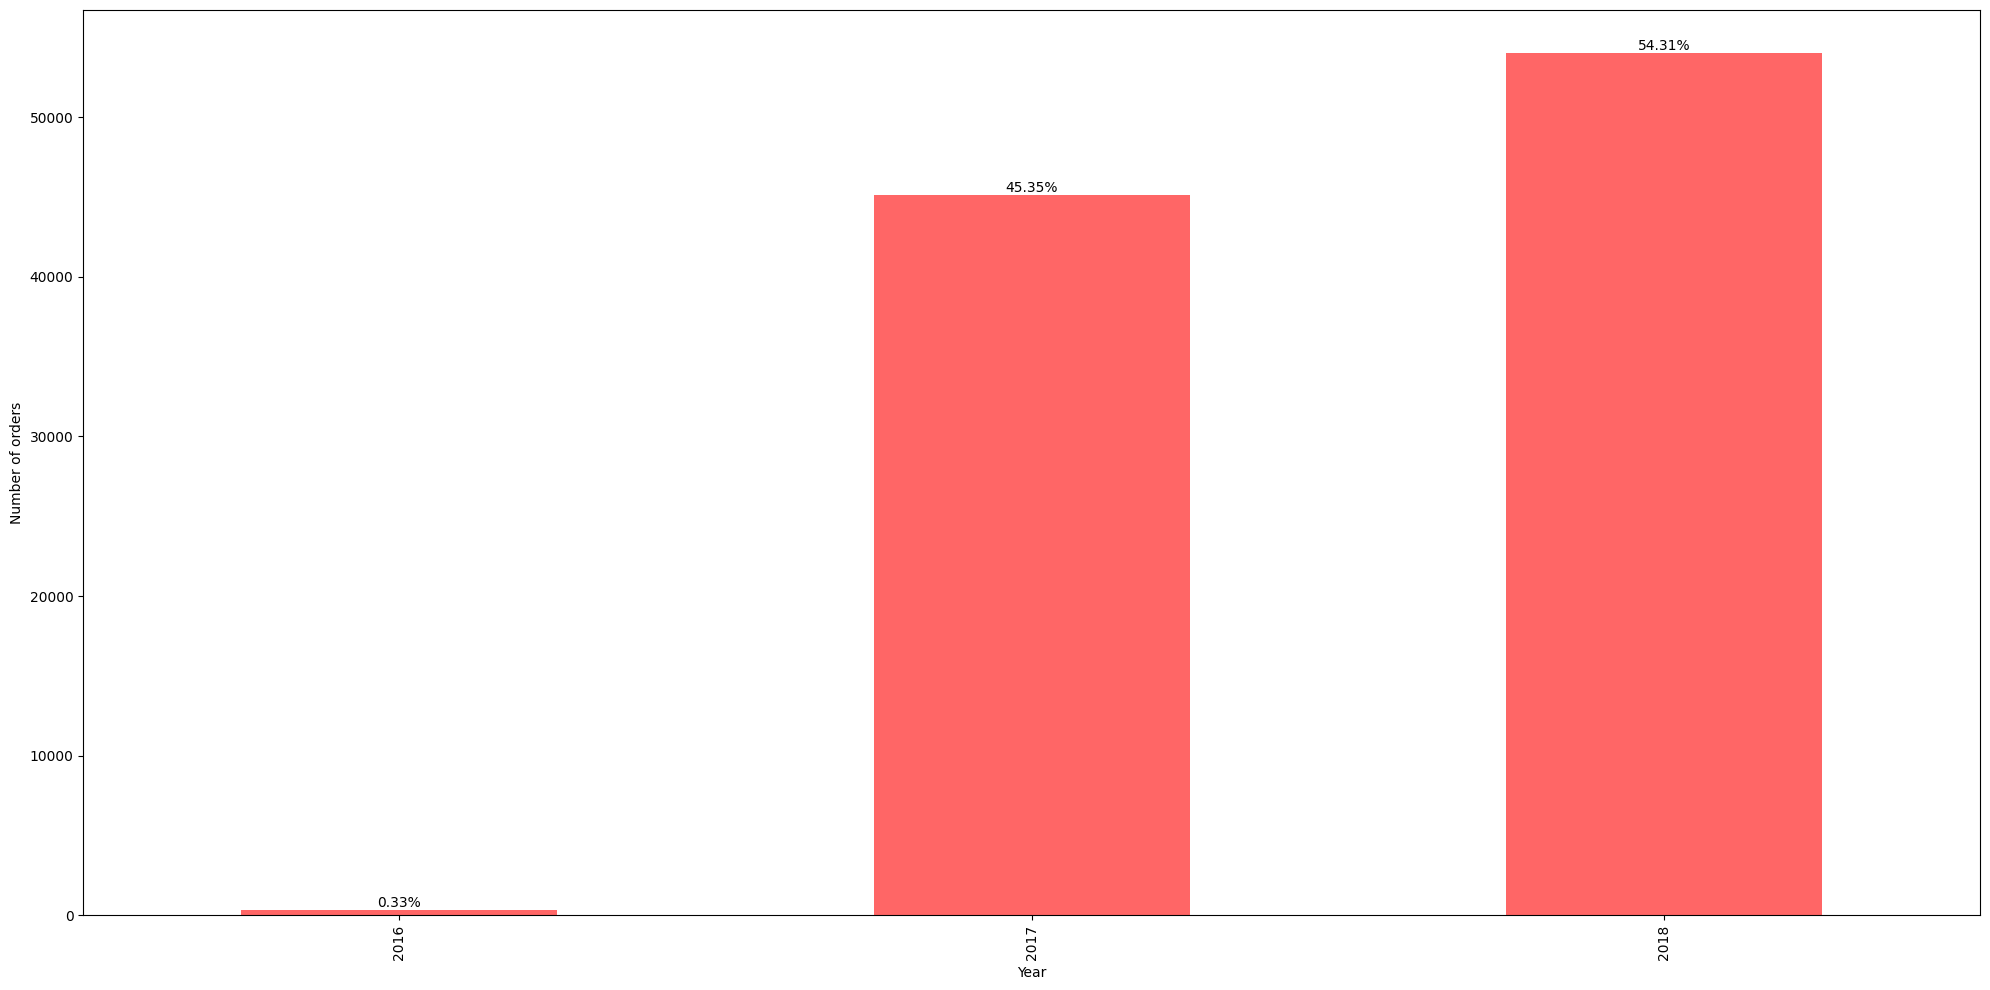

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have defined 'orders_fmt' DataFrame

fig, ax = plt.subplots(1, 1, figsize=(20, 10), tight_layout=True)

# Order purchased through years
orders_fmt['Year'] = orders_fmt['order_purchase_timestamp'].dt.year
barPlot = orders_fmt.groupby('Year').size().plot(kind='bar', ax=ax, color='#ff6666')
ax.set_ylabel("Number of orders")
ax.set_xlabel("Year")

for bar in barPlot.patches:
    ax.annotate(format((bar.get_height() / len(orders_fmt['Year']) * 100), '.2f') + "%",
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center',
                size=10, xytext=(0, 5),
                textcoords='offset points')

plt.show()


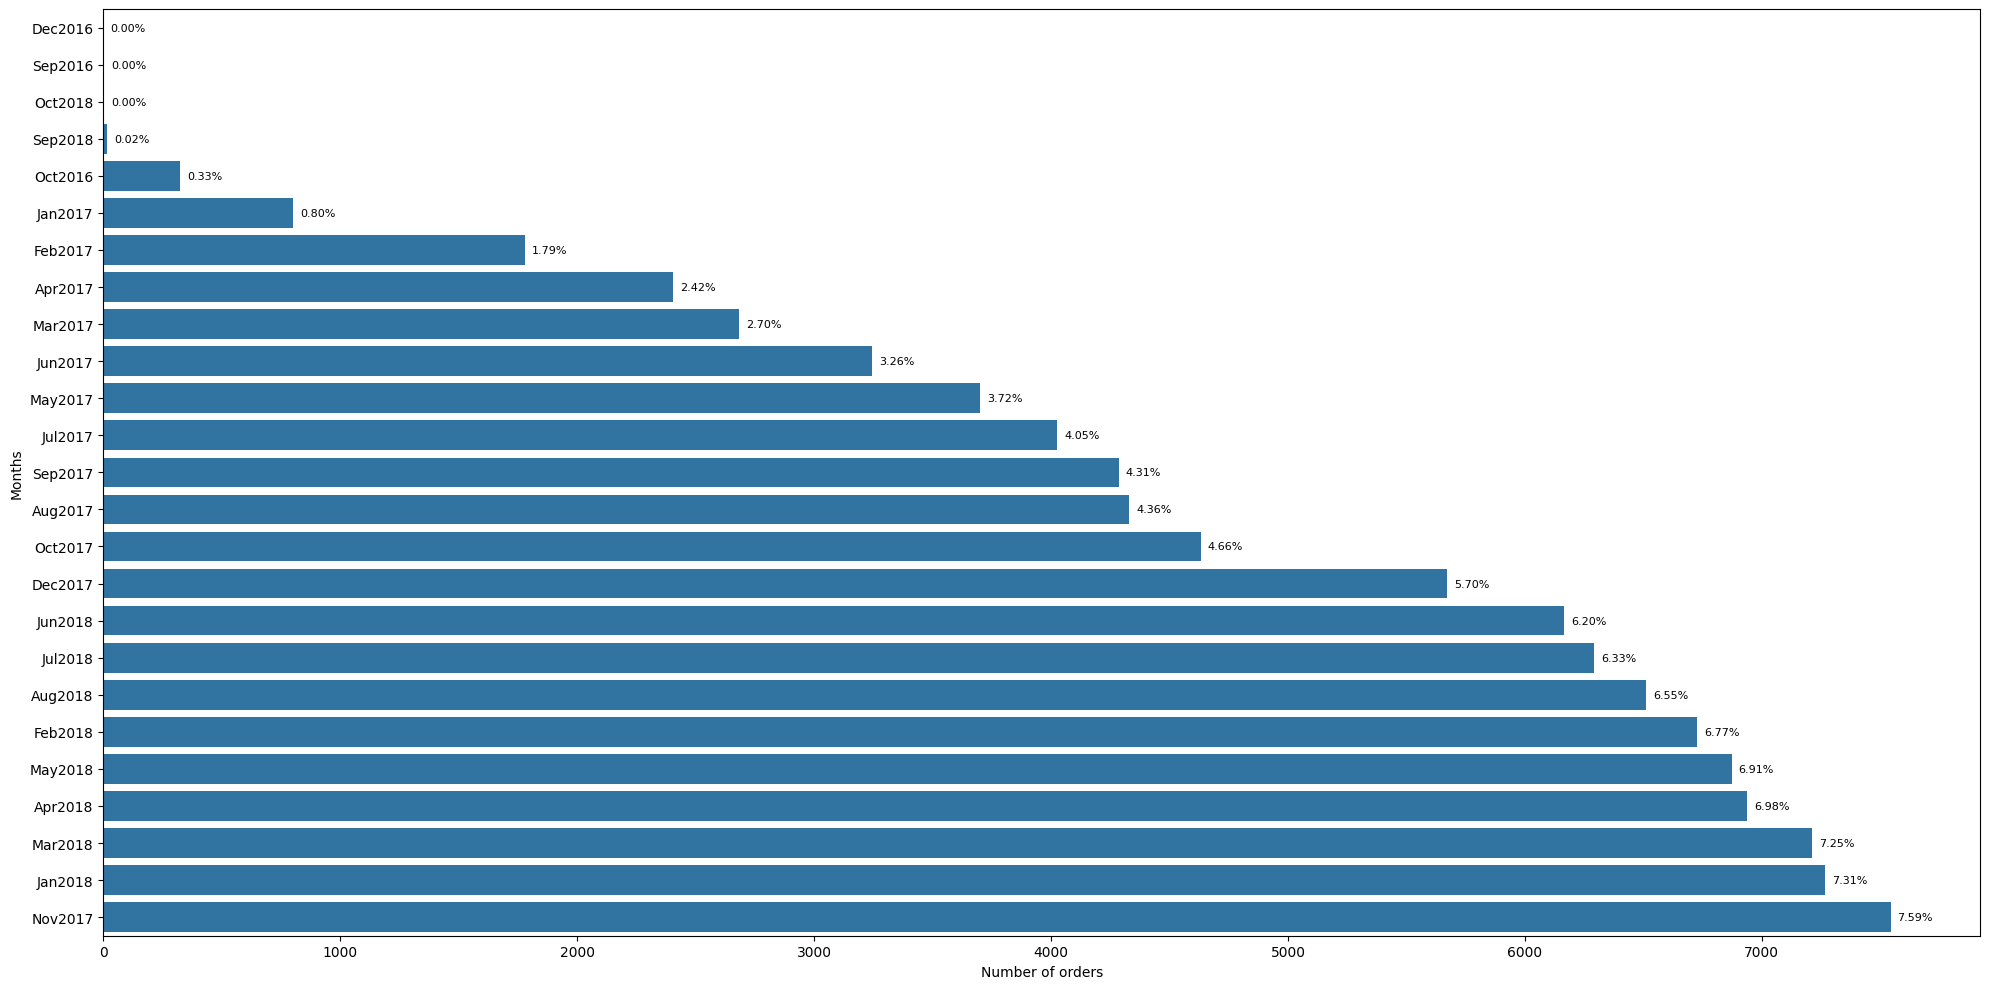

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have defined 'orders_fmt' DataFrame

fig, ax = plt.subplots(1, 1, figsize=(20, 10), tight_layout=True)

# Order purchased through months
orders_fmt['month'] = orders_fmt['order_purchase_timestamp'].dt.strftime('%b%Y')
barPlot2 = sns.barplot(y=orders_fmt.groupby('month').size().sort_values().index, 
                       x=orders_fmt.groupby('month').size().sort_values().values, ax=ax)
ax.set_xlabel("Number of orders")
ax.set_ylabel("Months")

for p in barPlot2.patches:
    ax.annotate(format((p.get_width() / len(orders_fmt['month']) * 100), '.2f') + "%",
                xy=(p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points',
                ha="left", va="center", fontsize=8)

plt.show()


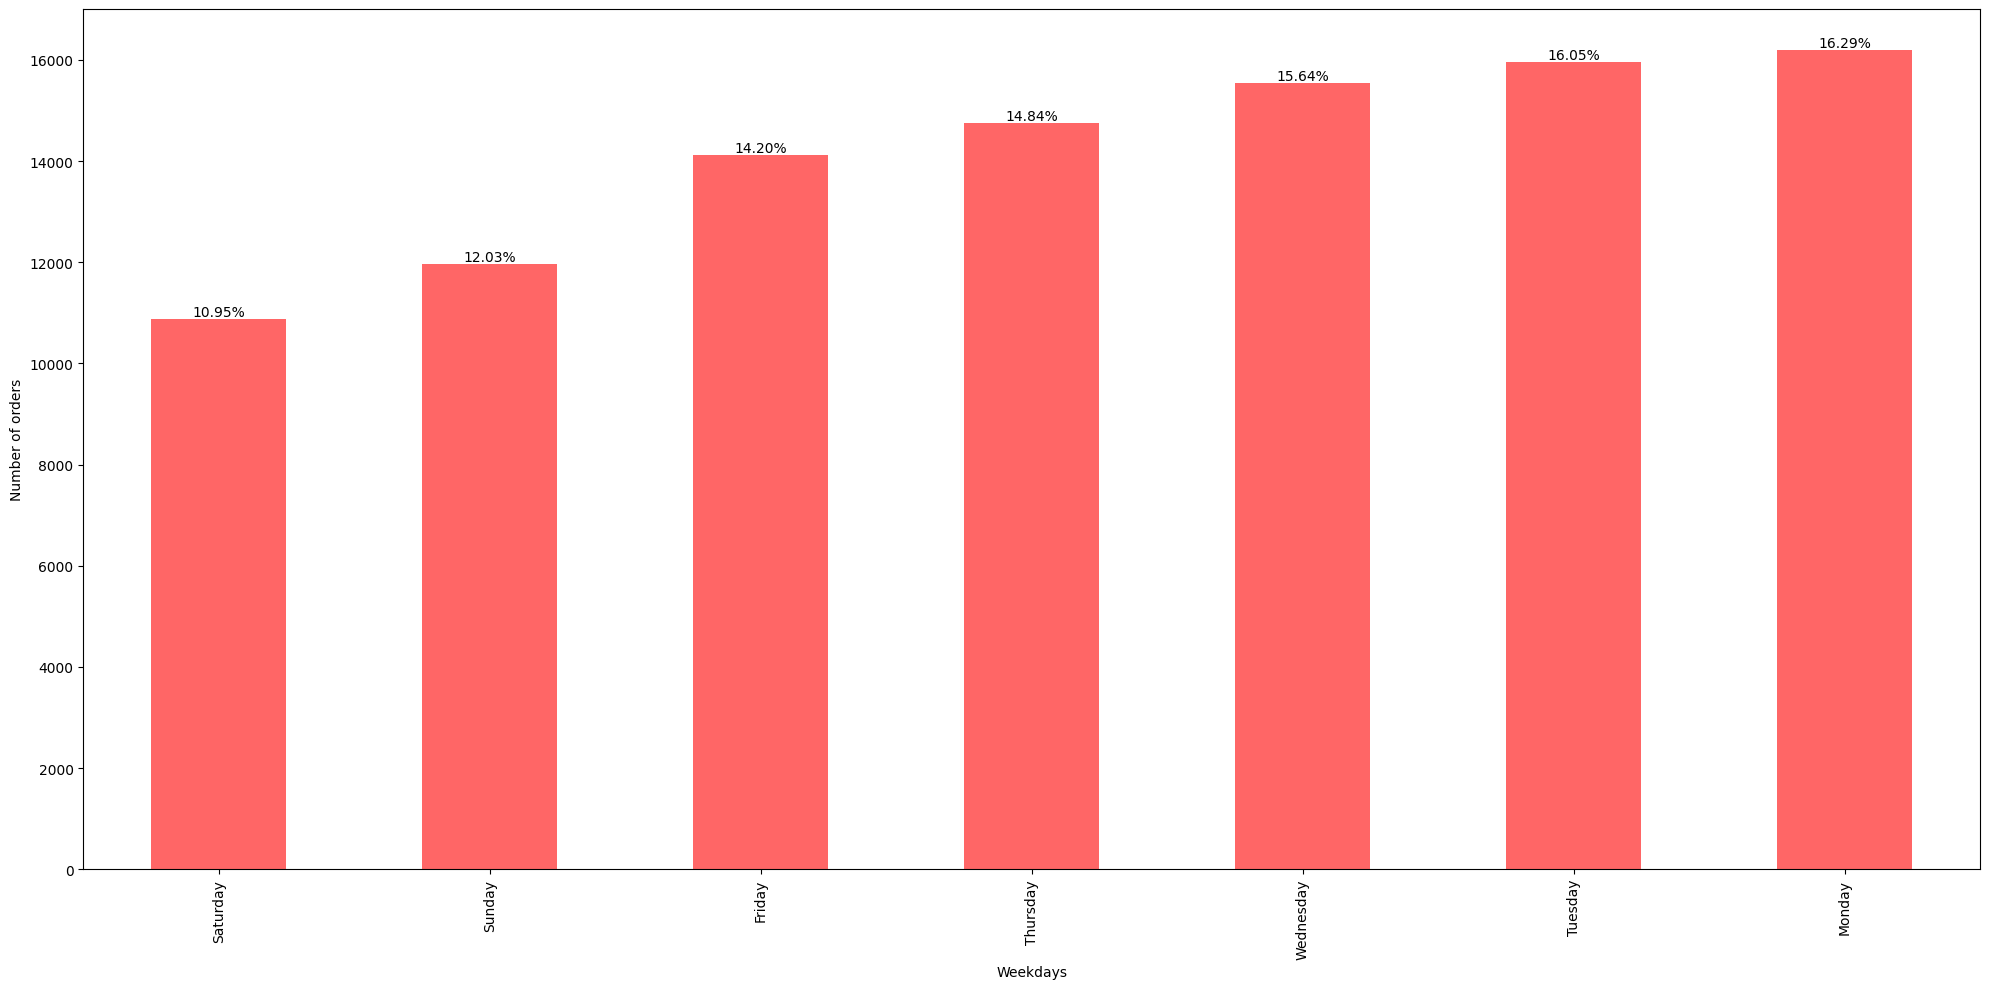

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have defined 'orders_fmt' DataFrame

fig, ax = plt.subplots(1, 1, figsize=(20, 10), tight_layout=True)

# Order purchased through weekdays
orders_fmt['weekdays'] = orders_fmt['order_purchase_timestamp'].dt.day_name()
barPlot3 = orders_fmt.groupby('weekdays').size().sort_values().plot(kind='bar', ax=ax, color='#ff6666')
ax.set_ylabel("Number of orders")
ax.set_xlabel("Weekdays")

for bar in barPlot3.patches:
    ax.annotate(format((bar.get_height() / len(orders_fmt['weekdays']) * 100), '.2f') + "%",
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center',
                size=10, xytext=(0, 5),
                textcoords='offset points')

plt.show()


## Data Integration


Integrating customer, order and order_items data sets into a unified repository, harmonizing structures and resolving schema mismatches to create a comprehensive dataset for holistic analysis.


In [25]:
data_train = data_orders.merge(data_customer, on="customer_id").merge(data_order_items, on="order_id").merge(data_products, on="product_id").merge(data_order_payments, on="order_id").merge(data_sellers, on="seller_id").merge(data_order_reviews, on="order_id")

data_geolocation['customer_zip_code_prefix'] = data_geolocation['geolocation_zip_code_prefix']
geol = data_geolocation.groupby(['customer_zip_code_prefix'],as_index=False).agg({
  'geolocation_lat':'mean',
  'geolocation_lng':'mean'
})
data_train = data_train.merge(geol,how='left',on='customer_zip_code_prefix')
data_train.shape

(117329, 41)

In [26]:
data_train.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,-23.576983,-46.587161
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,-23.576983,-46.587161
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,-23.576983,-46.587161
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,-23.564630,-46.534268
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,maua,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,-23.600462,-46.655318


In [27]:
data_train.describe().round(2)

,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix,review_score,geolocation_lat,geolocation_lng
count,117329.00,117329.00,117329.00,117329.00,115634.00,115634.00,115634.00,117309.00,117309.00,117309.00,117309.00,117329.00,117329.00,117329.00,117329.00,117329.00,117013.00,117013.00
mean,35060.12,1.19,120.52,20.03,48.77,785.80,2.21,2110.76,30.25,16.61,23.07,1.09,2.94,172.06,24450.78,4.03,-21.24,-46.20
std,29849.50,0.68,182.94,15.83,10.03,652.38,1.72,3785.13,16.18,13.45,11.75,0.73,2.78,265.39,27582.36,1.39,5.56,4.04
min,1003.00,1.00,0.85,0.00,5.00,4.00,1.00,0.00,7.00,2.00,6.00,1.00,0.00,0.00,1001.00,1.00,-33.69,-72.67
25%,11250.00,1.00,39.90,13.08,42.00,346.00,1.00,300.00,18.00,8.00,15.00,1.00,1.00,60.75,6429.00,4.00,-23.59,-48.11
50%,24240.00,1.00,74.90,16.28,52.00,600.00,1.00,700.00,25.00,13.00,20.00,1.00,2.00,108.10,13660.00,5.00,-22.93,-46.63
75%,58770.00,1.00,134.90,21.18,57.00,983.00,3.00,1800.00,38.00,20.00,30.00,1.00,4.00,189.06,28035.00,5.00,-20.18,-43.63
max,99990.00,21.00,6735.00,409.68,76.00,3992.00,20.00,40425.00,105.00,105.00,118.00,29.00,24.00,13664.08,99730.00,5.00,42.18,-8.72


dealing with missing values

In [28]:
def missing_values(df):
        # Total missing values
        mis_val = df.isnull().sum()
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [29]:
missing_values(data_train)

The dataframe has 41 columns.
There are 15 columns that have missing values.


,Missing Values,% of Total Values
review_comment_title,103437,88.2
review_comment_message,67650,57.7
order_delivered_customer_date,2471,2.1
product_category_name,1695,1.4
product_name_lenght,1695,1.4
product_description_lenght,1695,1.4
product_photos_qty,1695,1.4
order_delivered_carrier_date,1235,1.1
geolocation_lat,316,0.3
geolocation_lng,316,0.3


Calculation of metrics Recency Frequency Monetery.
For Segmentation for each metric separately *we will use k-means and method of elbow and assessment of silhouette to determine the optimal number of segments.

Output the final score with respect to clusters. Let's make sorting with respect to cluster number, so that increase of cluster number corresponds to increase of user's quality with respect to each of metrics.

We assume that metrics weights are equal for us.

First we start with RFM Analysis

In [30]:
import pandas as pd

# Assuming 'order_purchase_timestamp' is not already in datetime format
data_train['order_purchase_timestamp'] = pd.to_datetime(data_train['order_purchase_timestamp'])

# Recency 
data_rfm = data_train.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
recent_date = data_train['order_purchase_timestamp'].dt.date.max()  # Recent date of order
data_rfm['Recency'] = data_rfm["order_purchase_timestamp"].dt.date.apply(lambda x: (recent_date - x).days)

# Frequency
data_rfm['Frequency'] = data_train.groupby('customer_unique_id')['order_id'].transform('nunique')

# Monetry 
data_rfm['Monetary'] = data_train.groupby('customer_unique_id', as_index=False)['payment_value'].sum()['payment_value']

data_rfm



,customer_unique_id,order_purchase_timestamp,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116,2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119,2,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542,2,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293,1,196.89
...,...,...,...,...,...
94715,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,452,1,4134.84
94716,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,267,1,84.58
94717,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,573,1,112.46
94718,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,124,1,133.69


In [31]:
data_rfm.describe().T

,count,mean,min,25%,50%,75%,max,std
order_purchase_timestamp,94720,2018-01-03 07:09:09.244467968,2016-09-04 21:15:19,2017-09-15 23:22:18.500000,2018-01-22 17:09:20.500000,2018-05-07 12:49:25,2018-09-03 09:06:57,NaN
Recency,94720.0,243.338967,0.0,119.0,224.0,353.0,729.0,153.164273
Frequency,94720.0,1.08978,1.0,1.0,1.0,1.0,16.0,0.394197
Monetary,94720.0,213.132693,9.59,63.9,113.15,202.965,109312.64,630.134487


/tmp/ipykernel_420264/2231166261.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(1, 1, 1); sns.distplot(data_rfm['Recency'], bins=8,kde=False,rug=True)


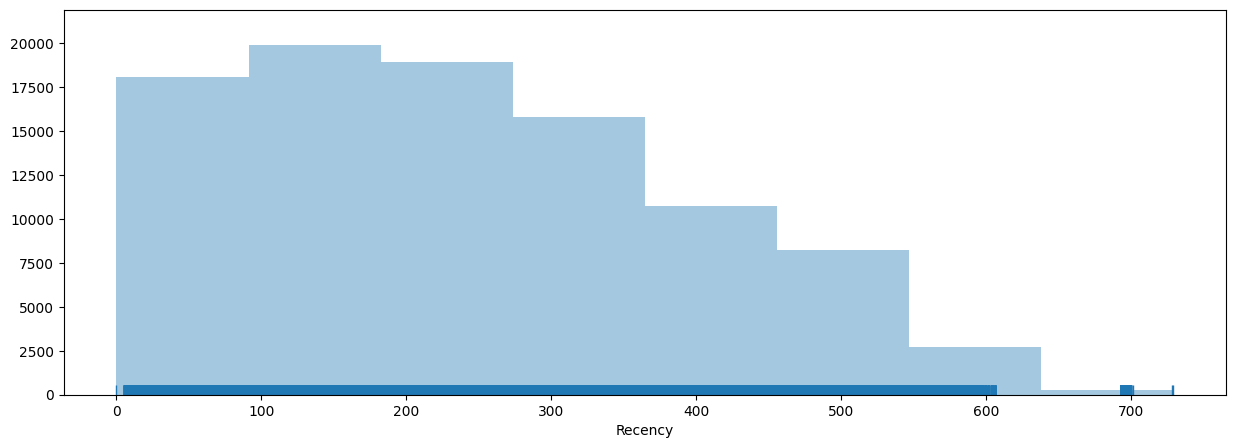

In [32]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 1, 1); sns.distplot(data_rfm['Recency'], bins=8,kde=False,rug=True)
plt.show()

/tmp/ipykernel_420264/1871647121.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(1, 1, 1); sns.distplot(data_rfm['Frequency'], bins=8,kde=False,rug=True)


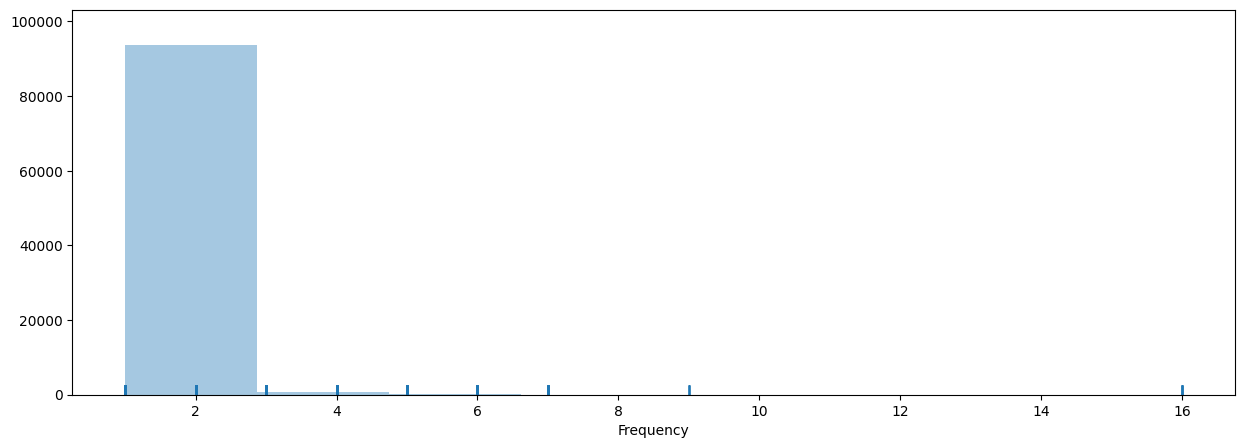

In [33]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 1, 1); sns.distplot(data_rfm['Frequency'], bins=8,kde=False,rug=True)
plt.show()


/tmp/ipykernel_420264/283612142.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(1, 1, 1); sns.distplot(data_rfm['Monetary'], bins=8,kde=False,rug=True)


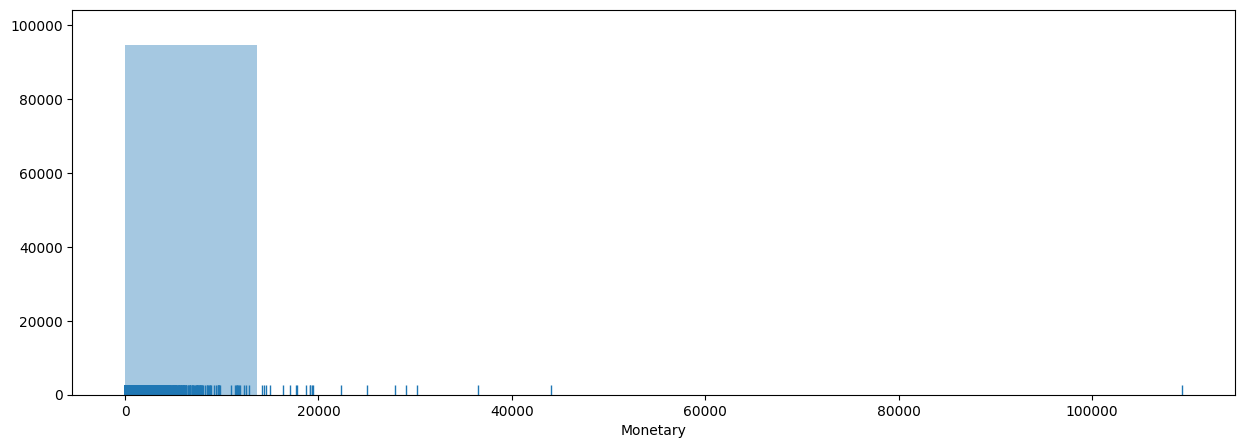

In [34]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 1, 1); sns.distplot(data_rfm['Monetary'], bins=8,kde=False,rug=True)
plt.show()


Recency - The concentration of customer is high in last 300-400 days, ie in the year.
Frequency - Customers who order 1 or 2 times are more and then we see who orders more times.
Monetary - Customers spending is mostly around 2000 Brazilian Real.



In [35]:
data_rfm["recency_score"]  = pd.qcut(data_rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
data_rfm["frequency_score"]= pd.qcut(data_rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
data_rfm["monetary_score"] = pd.qcut(data_rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

data_rfm['score_rfm'] = data_rfm.recency_score.astype(str)+ data_rfm.frequency_score.astype(str) + data_rfm.monetary_score.astype(str)
data_rfm.head()

,customer_unique_id,order_purchase_timestamp,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,score_rfm
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116,2,141.90,4,5,4,454
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119,2,27.19,4,5,1,451
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542,2,86.22,1,5,2,152
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293,1,196.89,2,1,4,214


In [36]:
seg_map= {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': '', 
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

In [37]:
data_rfm['Segments'] = data_rfm['recency_score'].astype(str) + data_rfm['frequency_score'].astype(str) + data_rfm['monetary_score'].astype(str)
data_rfm['Segments'] = data_rfm['Segments'].replace(seg_map, regex=True)
data_rfm.head()

,customer_unique_id,order_purchase_timestamp,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,score_rfm,Segments
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116,2,141.90,4,5,4,454,Champions
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119,2,27.19,4,5,1,451,Potential Loyalist
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542,2,86.22,1,5,2,152,At Risk
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326,1,43.62,2,1,1,211,
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293,1,196.89,2,1,4,214,Cannot Lose Them


In [38]:
data_rfm.groupby('Segments', as_index=False).agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary': "mean"
}) 

,Segments,Recency,Frequency,Monetary
0,,347.258146,1.000000,80.284560
1,About To Sleep,283.176660,1.055037,52.740977
2,At Risk,392.555428,1.124466,299.468646
3,Cannot Lose Them,440.881890,1.098341,365.347799
4,Champions,90.020617,1.263820,470.426198
5,Lost customers,480.792827,1.083544,45.146930
6,Loyal,182.139434,1.111980,389.339106
7,Need Attention,160.632858,1.000000,277.841192
8,New Customers,128.444444,1.000000,53.483047
9,Potential Loyalist,135.770353,1.165740,75.433454


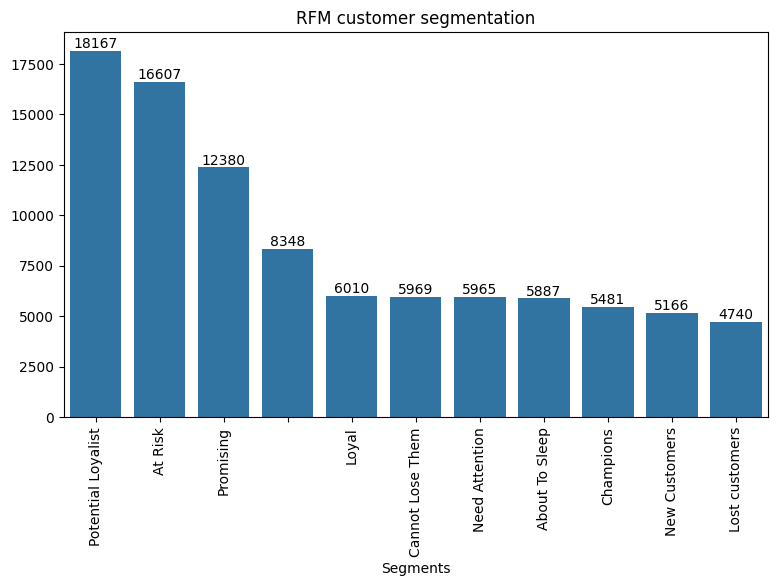

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plotSegment = sns.barplot(x=data_rfm['Segments'].value_counts().index, y=data_rfm['Segments'].value_counts().values)
for bar in plotSegment.patches:
    plotSegment.annotate(format(bar.get_height(), '.0f'),
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='center',
                         size=10, xytext=(0, 5),
                         textcoords='offset points')
plt.xticks(rotation=90)
plotSegment.set_title('RFM customer segmentation')
plotSegment.set_xlabel("Segments")

plt.show()


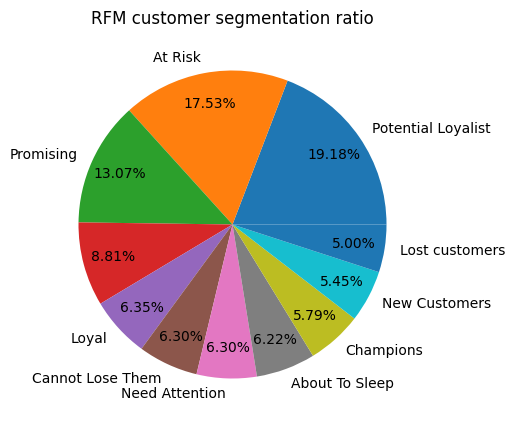

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 2)
plt.pie(data_rfm['Segments'].value_counts(),
        labels=data_rfm['Segments'].value_counts().index,
        autopct='%.2f%%', pctdistance=0.8)
plt.title("RFM customer segmentation ratio")
plt.show()


remove outliers

In [41]:
print((data_rfm["Frequency"].mode())[0])

1


In [42]:
pip install --upgrade matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


Scaling the data for better calculation


In [43]:
from sklearn.preprocessing import MinMaxScaler

data_cluster = data_rfm[["Frequency", "Recency", "Monetary"]]
data_cluster




,Frequency,Recency,Monetary
0,2,116,141.90
1,2,119,27.19
2,2,542,86.22
3,1,326,43.62
4,1,293,196.89
...,...,...,...
94715,1,452,4134.84
94716,1,267,84.58
94717,1,573,112.46
94718,1,124,133.69


Making our daraset parameters normally distributed

/tmp/ipykernel_420264/4122043633.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster[col] = np.log(data_cluster[col])
/tmp/ipykernel_420264/4122043633.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cluster['Recency'], color="#66b3ff")
/tmp/ipykernel_420264/4122043633.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt 

Text(0.5, 1.0, 'Distribution for Monetary')

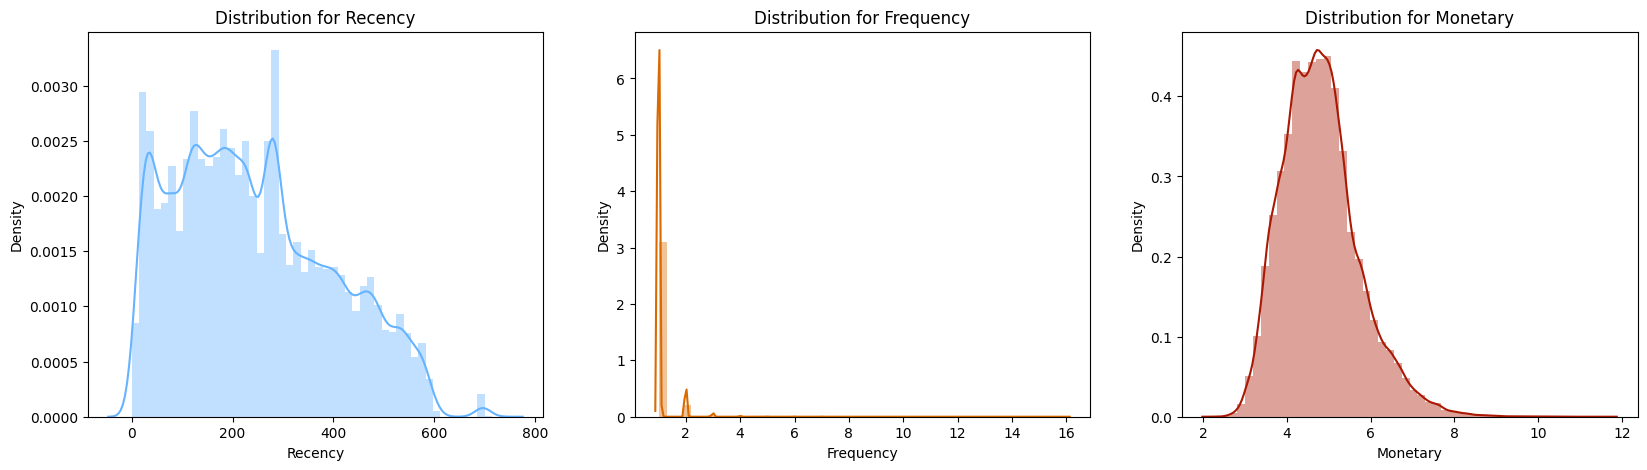

In [44]:
cols = ['Monetary']

for col in cols:
    data_cluster[col] = np.log(data_cluster[col])


plt.subplots(1, 3, figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.distplot(data_cluster['Recency'], color="#66b3ff")
plt.title('Distribution for Recency') 

plt.subplot(1, 3, 2)
sns.distplot(data_cluster['Frequency'], color="#DA6A00")
plt.title('Distribution for Frequency') 

plt.subplot(1, 3, 3)
sns.distplot(data_cluster['Monetary'], color="#AA1803")
plt.title('Distribution for Monetary')

removing outliers from our dataset

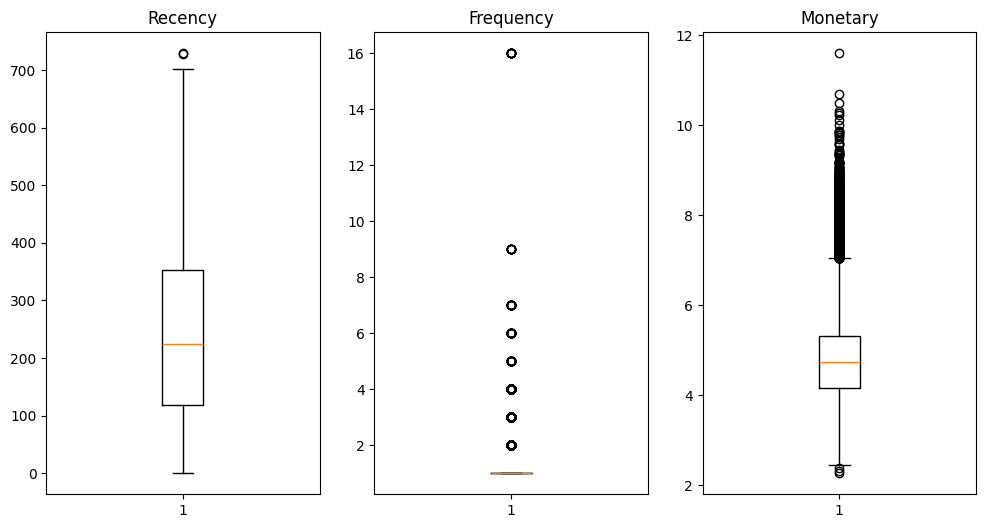

In [45]:
import pandas as pd
import matplotlib.pyplot as plt


# Visualize boxplots for each column
plt.figure(figsize=(12, 6))

# Boxplot for Recency
plt.subplot(1, 3, 1)
plt.boxplot(data_cluster['Recency'])
plt.title('Recency')

# Boxplot for Frequency
plt.subplot(1, 3, 2)
plt.boxplot(data_cluster['Frequency'])
plt.title('Frequency')

# Boxplot for Monetary
plt.subplot(1, 3, 3)
plt.boxplot(data_cluster['Monetary'])
plt.title('Monetary')

plt.show()


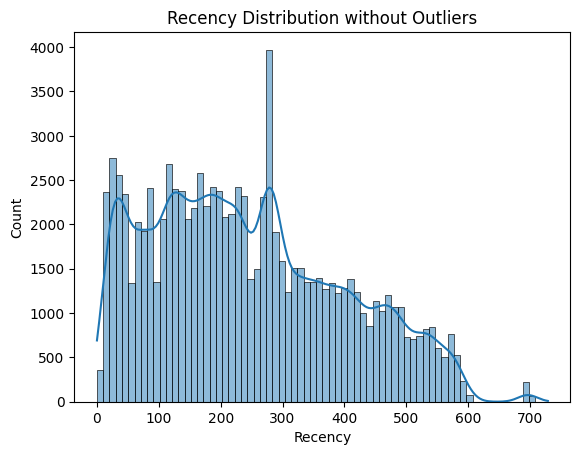

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data_cluster['Recency'], kde=True)
plt.title('Recency Distribution without Outliers')
plt.show()


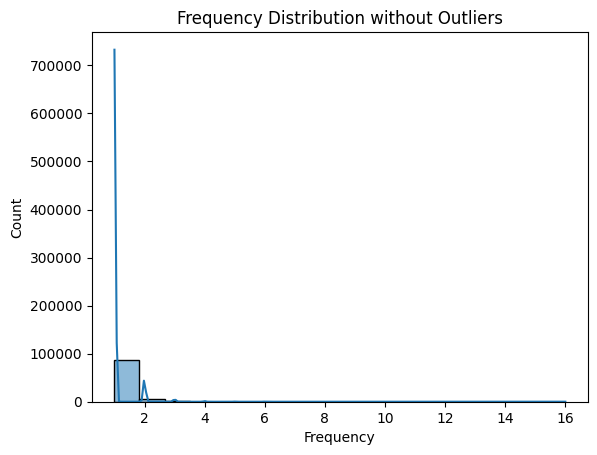

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data_cluster['Frequency'], kde=True)
plt.title('Frequency Distribution without Outliers')
plt.show()

In [48]:
data_cluster

,Frequency,Recency,Monetary
0,2,116,4.955123
1,2,119,3.302849
2,2,542,4.456902
3,1,326,3.775516
4,1,293,5.282645
...,...,...,...
94715,1,452,8.327204
94716,1,267,4.437698
94717,1,573,4.722598
94718,1,124,4.895524


we want to  transform features to be on a similar scale for better results in the clustering model

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Assuming 'data_cluster' is your DataFrame with columns 'Frequency', 'Recency', and 'Monetary'
data_cluster_scaled = pd.DataFrame(scaler.fit_transform(data_cluster), columns=data_cluster.columns)


<Axes: ylabel='Frequency'>

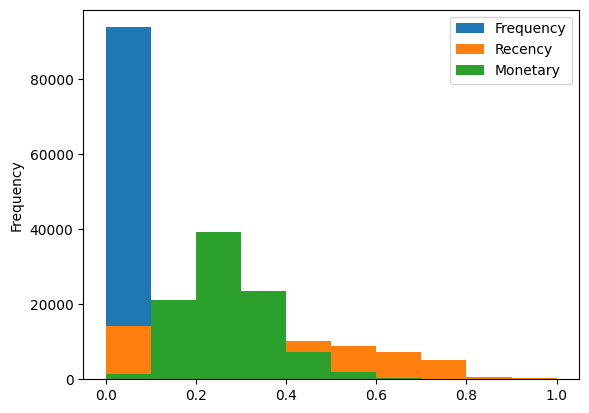

In [50]:
data_cluster_scaled.plot(kind='hist')

In [51]:
data_cluster_scaled

,Frequency,Recency,Monetary
0,0.066667,0.159122,0.288441
1,0.066667,0.163237,0.111562
2,0.066667,0.743484,0.235106
3,0.000000,0.447188,0.162162
4,0.000000,0.401920,0.323503
...,...,...,...
94715,0.000000,0.620027,0.649430
94716,0.000000,0.366255,0.233050
94717,0.000000,0.786008,0.263549
94718,0.000000,0.170096,0.282061


In [52]:
data_cluster_scaled.dropna(axis=0, inplace=True)

### K-Means Clustering

First we defined how many clusters we have using the elbow method

/home/dhia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dhia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dhia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dhia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

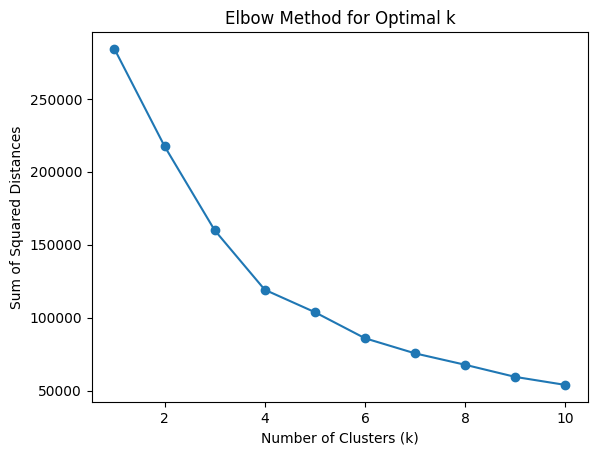

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Standardize the features (important for k-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cluster_scaled)

# Run k-means clustering for a range of values of k
# Try different values of k, for example, from 1 to 10 clusters
k_values = range(1, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()


The elbow method gave us k=4 so we have 4 clusters

In [54]:
kmeansSelected= KMeans(n_clusters=4)
kmeansSelected.fit(data_cluster_scaled)

clustered_kmeans = data_cluster_scaled.copy()
clustered_kmeans['labels_kmeans']= kmeansSelected.labels_

rfm_labels = pd.DataFrame(data=kmeansSelected.labels_, columns=['kmeans'])
# groupig the recency, frequency and monetary value on the basis of clusters

clustered_kmeans.groupby(['labels_kmeans']).agg({
            'Recency': 'mean',
            'Frequency': 'mean',
            'Monetary': ['mean', 'count'],
           
        })




/home/dhia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Recency Frequency  Monetary       
                   mean      mean      mean  count
labels_kmeans                                     
0              0.640850  0.005934  0.274007  21526
1              0.118247  0.005921  0.236039  28780
2              0.371951  0.005935  0.241375  30038
3              0.225835  0.006298  0.406506  14376

Ecaluating our model using Silhouette score

Silhouette score is in the range of -1 to 1. A score near 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Assuming 'clustered_kmeans' is your data and 'kmeansSelected' is your fitted KMeans model

# Create and fit a StandardScaler
scaler = StandardScaler()
X_clustered_scaled = scaler.fit_transform(clustered_kmeans)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_clustered_scaled, kmeansSelected.labels_)

print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4150537918193837


we use visualisation to better understand our results and specify the content of the segments

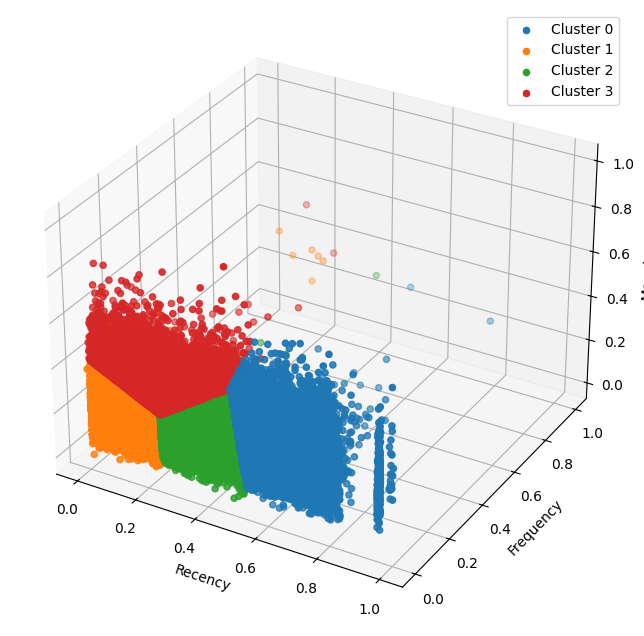

In [56]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster in range(4):  # Assuming 6 clusters
    cluster_data = clustered_kmeans[clustered_kmeans['labels_kmeans'] == cluster]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], label=f'Cluster {cluster}')

# Set labels
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Add a legend
ax.legend()

plt.show()


#  Gaussian Mixture clustering

we used the silhouette analysis to define the number of clusters in the gaussian mixture clustering model

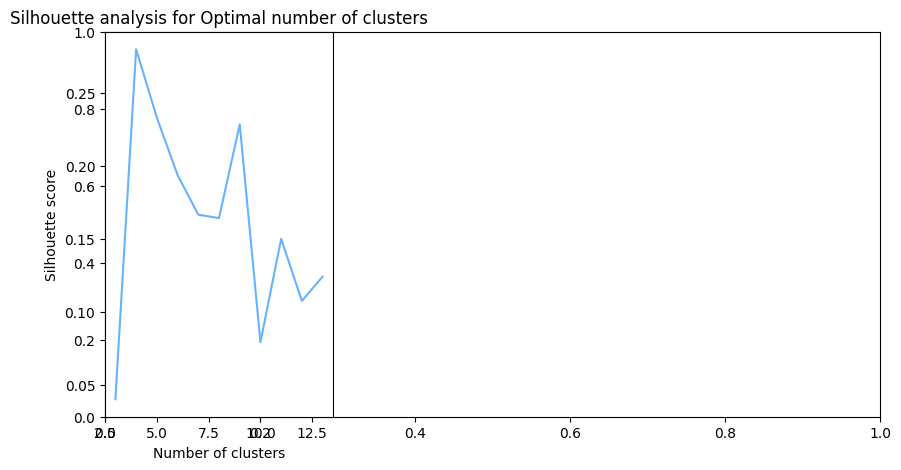

In [57]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sil_score_gmm = []

n_components = range(3, 14)

for k in n_components:
    gmm = GaussianMixture(n_components=k, covariance_type='full')
    gmm.fit(data_cluster_scaled)
    pred = gmm.predict(data_cluster_scaled)
    sil_score_gmm.append(silhouette_score(data_cluster_scaled, pred))

plt.subplots(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(n_components, sil_score_gmm, color="#66b3ff")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis for Optimal number of clusters')

plt.show()


the maximum of the curve is at x = 6 so we choose 6 clusters for our Gaussian Mixture clustering Model

In [58]:
from sklearn.mixture import GaussianMixture

cluster_gmm = GaussianMixture(n_components=6)
cluster_gmm.fit(data_cluster_scaled)

clustered_gmm = data_cluster_scaled.copy()
clustered_gmm['labels_gmm'] = cluster_gmm.predict(data_cluster_scaled)

# groupig the recency, frequency and monetary value on the basis of clusters
clustered_gmm.groupby(['labels_gmm']).agg({
             'Recency': 'mean',
            'Frequency': 'mean',
            'Monetary': ['mean', 'count'],
            
        })

Recency Frequency  Monetary       
                mean      mean      mean  count
labels_gmm                                     
0           0.332794  0.066667  0.272964   5959
1           0.071221  0.000000  0.270211  17834
2           0.738753  0.000000  0.352372   3785
3           0.266213  0.000000  0.232599  32545
4           0.493118  0.000000  0.302565  33637
5           0.330220  0.176736  0.270081    960

Evaluation

In [59]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=5)
gmm.fit(data_cluster_scaled)
labels_gmm = gmm.predict(data_cluster_scaled)

# Calculate silhouette score
sil_score_gmm = silhouette_score(data_cluster_scaled, labels_gmm)

# Update 'data_score_clustering' DataFrame
data_score_clustering = pd.DataFrame(columns=["Method", "Clusters", "Silhouette Score"])
data_score_clustering.loc[1] = ["Gaussian mixture", 6, sil_score_gmm]

# Print the silhouette score
print("Silhouette score for 5 clusters from Gaussian Mixture Model:", sil_score_gmm)


Silhouette score for 5 clusters from Gaussian Mixture Model: 0.21567103338942062


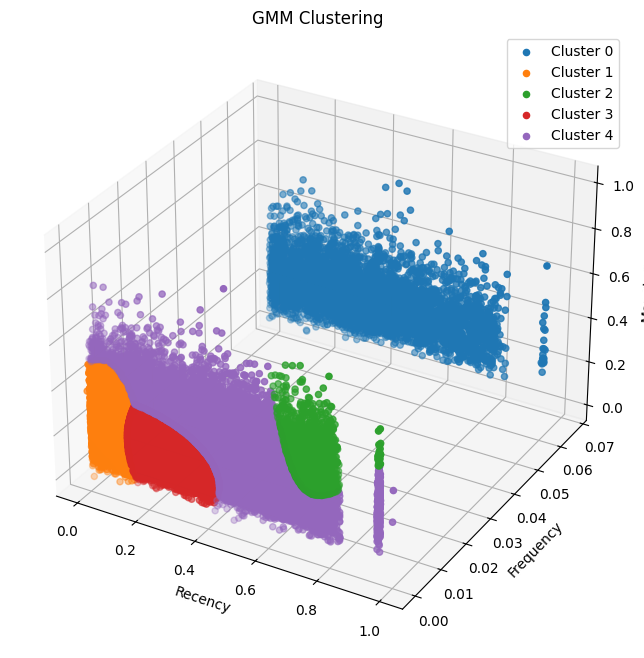

In [60]:
from mpl_toolkits.mplot3d import Axes3D



# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster in range(5):  # Assuming 5 clusters for GMM
    cluster_data = clustered_gmm[clustered_gmm['labels_gmm'] == cluster]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], label=f'Cluster {cluster}')

# Set labels
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Add a legend
ax.legend()

plt.title('GMM Clustering')
plt.show()


## Interpretation

Using the evaluation metric Silhouette Score K-means clustering has dividedt he customers base better because it has a score of 0.47 and Gaussian mixture has a score of 0.2

## Conclusion

Results:

After applying both clustering algorithms, the silhouette score, a measure of clustering quality, was used to evaluate their performance. The K-means algorithm outperformed the Gaussian Mixture Model, yielding a higher silhouette score. As a result, the subsequent analysis and insights are based on the segmentation achieved through the K-means clustering.
Customer Segments:
1. Valuable:

    Description: Average customers requiring attention.
    Recommendations:
        Create brand awareness through marketing initiatives.
        Offer free trials and limited-time promotions.
        Provide discounts and incentives to encourage repeat purchases.
        Address high delivery days and shipping costs to enhance customer satisfaction.

2. Passive:

    Description: Below-average customers with potential.
    Recommendations:
        Increase awareness of the entire product range.
        Offer discounts for payments made using credit cards and Boleto.
        Provide free freight to attract interest.
        Motivate purchases through targeted promotions.

3. Risky:

    Description: Customers who haven't made recent purchases.
    Recommendations:
        Send personalized emails and messages to reconnect.
        Share special offers and resources to reactivate interest.
        Implement a customer points system redeemable for vouchers.
        Encourage engagement to stimulate future purchases.

4. Loyal:

    Description: Frequent and high-spending customers.
    Recommendations:
        Reward loyalty through exclusive benefits and offers.
        Upsell high-value items to maximize their spending potential.
        Notify them of relevant events and product launches.
        Encourage referrals and seek feedback for continuous improvement.

Conclusion:

The K-means clustering algorithm provided a robust segmentation of customers based on RFM analysis. The identified segments offer actionable insights and targeted strategies to enhance customer engagement, satisfaction, and loyalty. The recommendations provided for each segment serve as a guide for implementing tailored marketing and communication strategies, ultimately optimizing the overall customer experience.